* Summarize the wind info in the events of interests.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
import wind
import datetime, os
import netCDF4 as nc
from windrose import WindroseAxes
from salishsea_tools import (nc_tools,viz_tools, stormtools,tidetools,geo_tools)
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

In [3]:
def get_OPwinds(stationsOP,OPlon,OPlat,filesOP,j,i,duration,sax,eax):
    "This function was made to get model winds' speed and direction"
    wind_speed = {}; wind_dir = {}; time = {}; lat={}; lon={}; press={}; temp={}; therm={};
    solar={}; precip={}; qair={}; lon = {};lat = {};

    for  modOP in stationsOP:   
        
        [j,i]=wind.find_model_point(X[j,i],Y[j,i],OPlon,OPlat)
        lon[modOP] = OPlon[j,i]
        lat[modOP]=OPlat[j,i]
        print(j,i,lon[modOP],lat[modOP])

        [wind_speed[modOP],wind_dir[modOP],time[modOP],
         press[modOP],temp[modOP],solar[modOP],
         therm[modOP],qair[modOP],precip[modOP]] = wind.compile_OP(filesOP,j,i)    
      
    return wind_speed, wind_dir

# Load wind model results

In [4]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)

OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]

start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

#wind_speed,wind_dir =wind.get_OPwinds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       #27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)
wind_speed,wind_dir =get_OPwinds(stationsOP,OPlon,OPlat,filesOP,426,293,\
                            27,sax,eax)

135 151 -123.302707487 49.0907848354


In [5]:
## convert direction Oct
wind_dir_correct = []
for dire in wind_dir['Sandheads_OP']:
    dire_corre =  450 - dire
    wind_dir_correct.append(dire_corre)
## load into a pandas frame
df_oct = pd.DataFrame({"speed": wind_speed['Sandheads_OP'], "direction": wind_dir_correct})

In [6]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m05d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-May-2015'; end = '31-May-2015';
start2 = '31-May-2015'; end2 = '31-May-2015';
endd = '31-May-2015';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speedMay,wind_dirMay =get_OPwinds(stationsOP,OPlon,OPlat,filesOP,426,293,\
                       27,sax,eax)

135 151 -123.302707487 49.0907848354


In [7]:
## May
wind_dir_correctMay = []
for dire in wind_dirMay['Sandheads_OP']:
    dire_corre = 450 - dire
    wind_dir_correctMay.append(dire_corre)
df_may = pd.DataFrame({"speed": wind_speedMay['Sandheads_OP'], "direction": wind_dir_correctMay})

In [8]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2016m01d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Jan-2016'; end = '31-Jan-2016';
start2 = '31-Jan-2016'; end2 = '31-Jan-2016';
endd = '31-Jan-2016';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

wind_speedJan,wind_dirJan =get_OPwinds(stationsOP,OPlon,OPlat,filesOP,426,293,\
                       27,sax,eax)

135 151 -123.302707487 49.0907848354


In [9]:
## Jan
wind_dir_correctJan = []
for dire in wind_dirJan['Sandheads_OP']:
    dire_corre =  450 - dire 
    wind_dir_correctJan.append(dire_corre)
df_jan = pd.DataFrame({"speed": wind_speedJan['Sandheads_OP'], "direction": wind_dir_correctJan})

# Jan

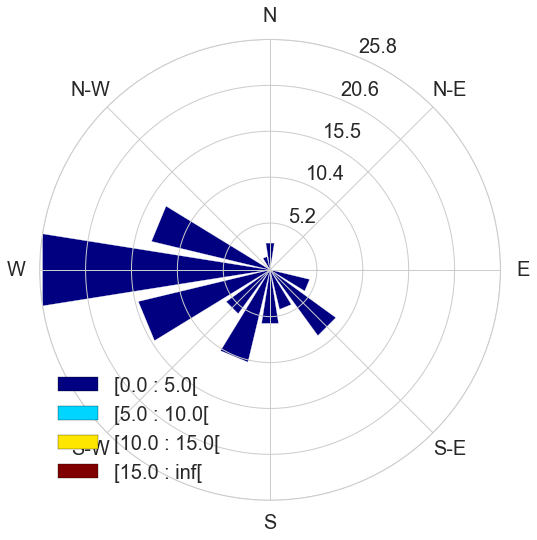

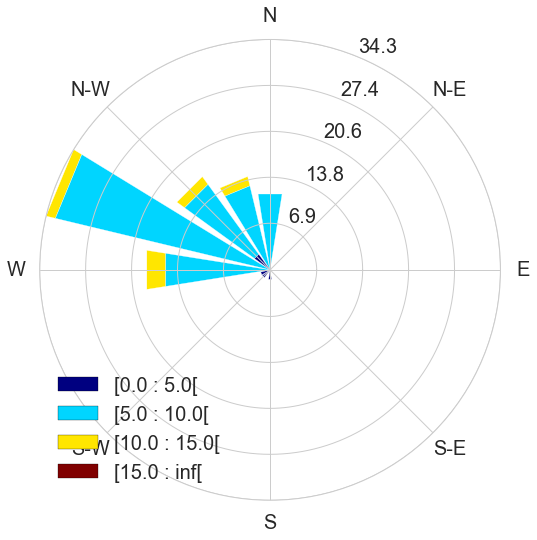

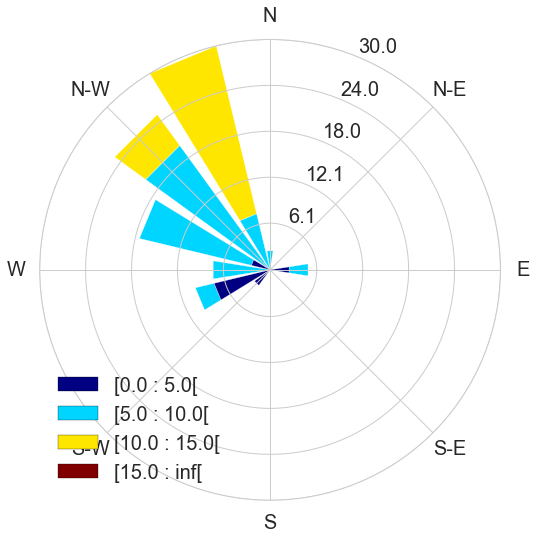

In [10]:
ax = WindroseAxes.from_ax()
ax.bar(df_jan.direction[168:239], df_jan.speed[168:239], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_jan.direction[384:455], df_jan.speed[384:455], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_jan.direction[624:671], df_jan.speed[624:671], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

# Oct

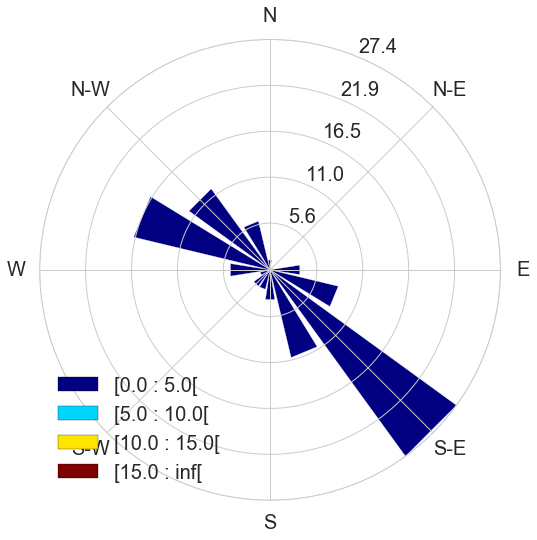

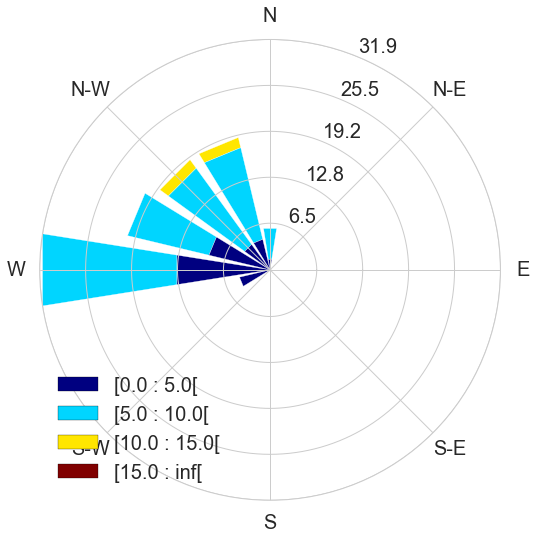

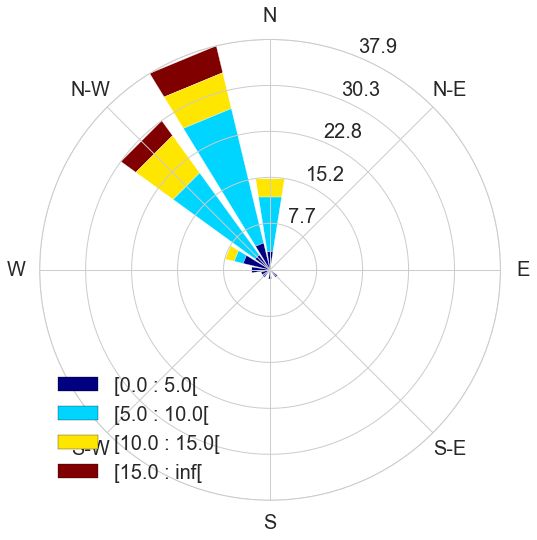

In [11]:
## Oct 
ax = WindroseAxes.from_ax()
ax.bar(df_oct.direction[48:144], df_oct.speed[48:144], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_oct.direction[408:480], df_oct.speed[408:480], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_oct.direction[480:551], df_oct.speed[480:551], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

# May

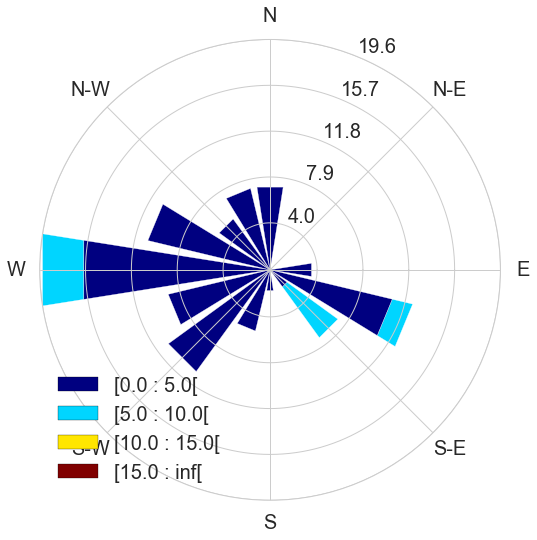

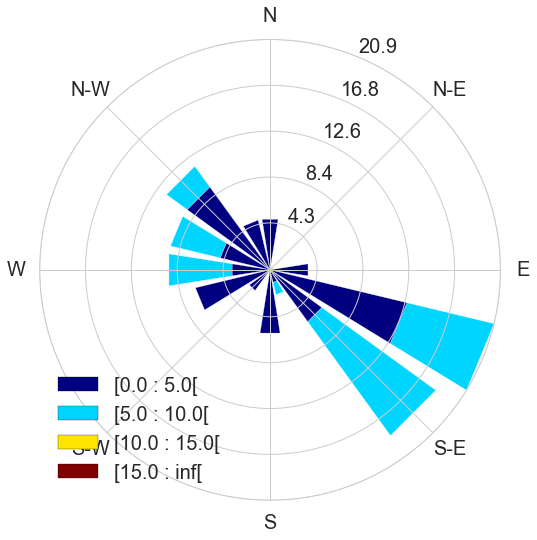

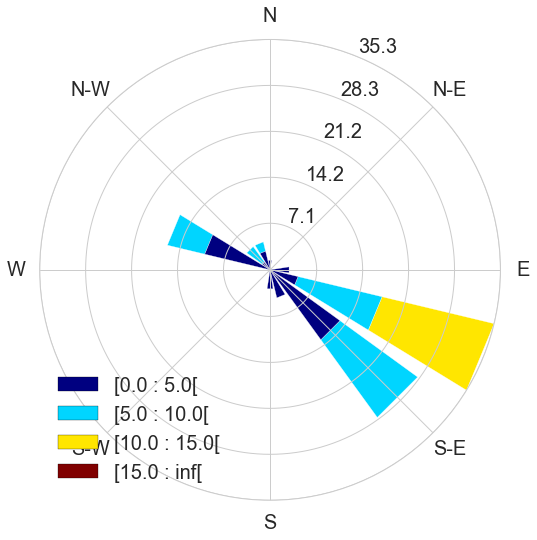

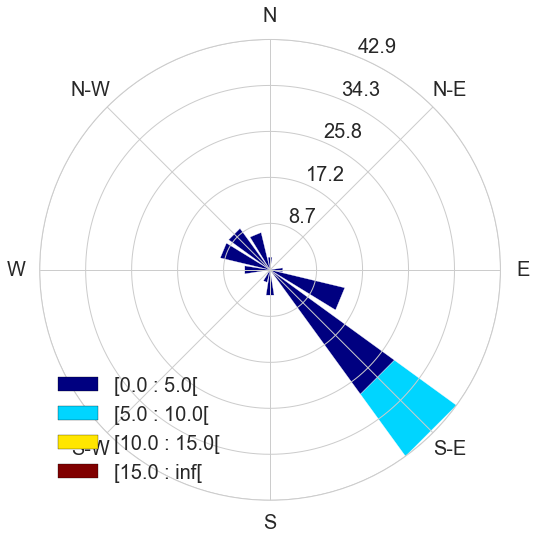

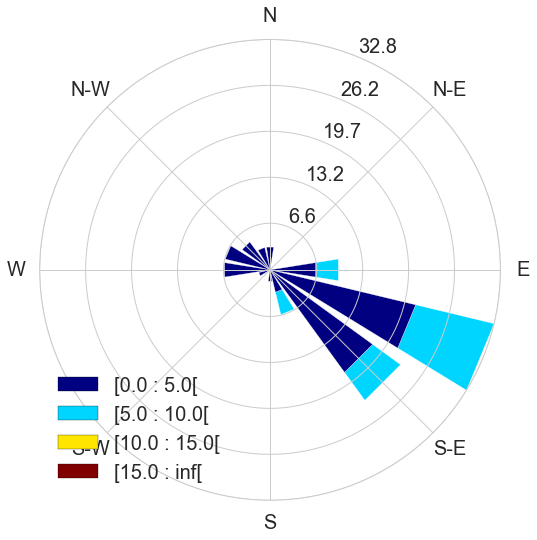

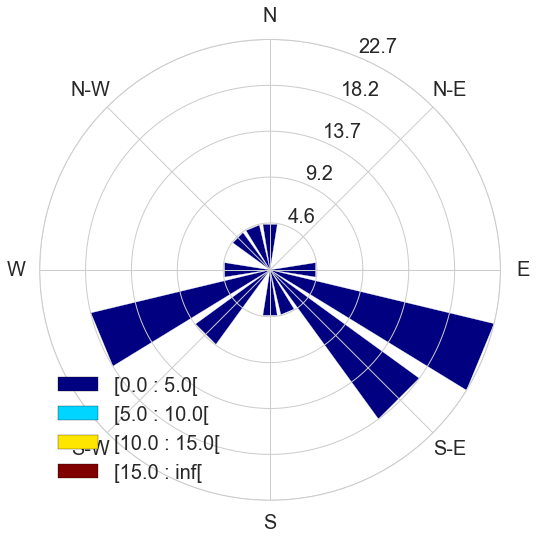

In [12]:
## May
ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[192:263], df_may.speed[192:263], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[360:455], df_may.speed[360:455], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[24:95], df_may.speed[24:95], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[648:695], df_may.speed[648:695], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[144:216], df_may.speed[144:216], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

ax = WindroseAxes.from_ax()
ax.bar(df_may.direction[100:144], df_may.speed[100:144], bins=np.arange(0, 20, 5),normed=True, opening=0.8, edgecolor='white')
ax.legend()

# Wind quiver time series

In [13]:
## Note wind rose 0 starts from N, and goes clockwise, so here need to be 450 - direc as the wind quiver going to!
u = np.zeros([1,len(df_may)])
v = np.zeros([1,len(df_may)])
for i in np.arange(len(df_may)):
    u[0,i] = df_may.speed[i] * np.cos((450-df_may.direction[i])*np.pi/180)
    v[0,i] = df_may.speed[i] * np.sin((450-df_may.direction[i])*np.pi/180)

* May : 288 ~455

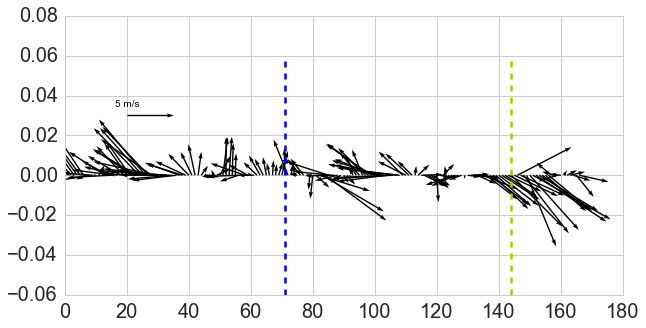

In [14]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
quiver = ax.quiver(u[:,288:455],v[:,288:455],scale = 60,width=0.0025, color='k')
ax.plot([359-288,359-288],[-0.06,0.06],'b--')
ax.plot([432-288,432-288],[-0.06,0.06],'y--')
ax.quiverkey(quiver,20,0.03, 5, '5 m/s',coordinates='data', color='black', labelcolor='black')

* May: 648~695

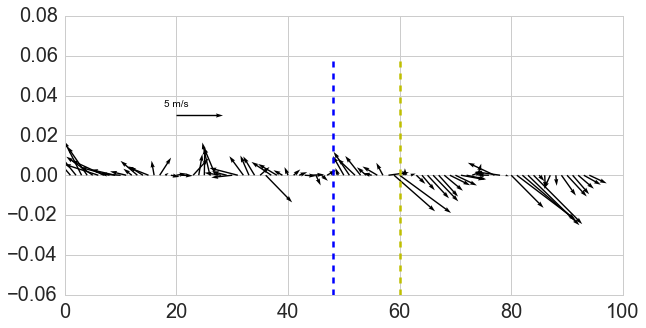

In [15]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
quiver = ax.quiver(u[:,600:695],v[:,600:695],scale = 60,width=0.0025, color='k')
ax.plot([648-600,648-600],[-0.06,0.06],'b--')
ax.plot([660-600,660-600],[-0.06,0.06],'y--')
#ax.plot([432-288,432-288],[-0.06,0.06],'y--')
ax.quiverkey(quiver,20,0.03, 5, '5 m/s',coordinates='data', color='black', labelcolor='black')

* May: 144~216

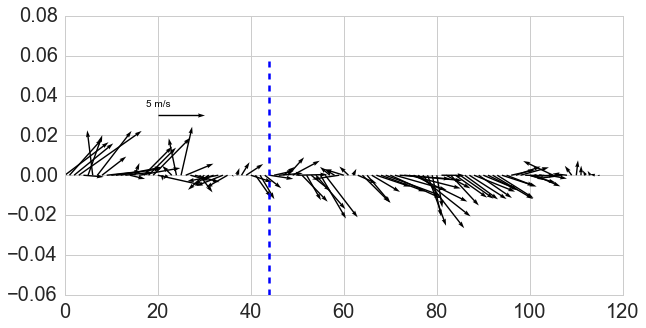

In [16]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
quiver = ax.quiver(u[:,100:216],v[:,100:216],scale = 60,width=0.0025, color='k')
ax.plot([144-100,144-100],[-0.06,0.06],'b--')
#ax.plot([660-600,660-600],[-0.06,0.06],'y--')
ax.quiverkey(quiver,20,0.03, 5, '5 m/s',coordinates='data', color='black', labelcolor='black')

* May

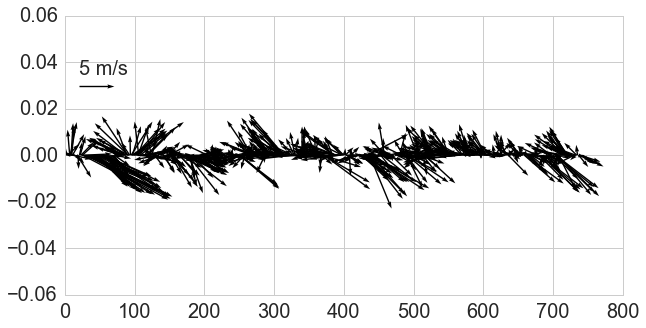

In [64]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
quiver = ax.quiver(u[:],v[:],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '',coordinates='data', color='black', labelcolor='black')
ax.text(20,0.035,'5 m/s', fontsize = 20)

* Oct

In [17]:
u_oct = np.zeros([1,len(df_oct)])
v_oct = np.zeros([1,len(df_oct)])
for i in np.arange(len(df_oct)):
    u_oct[0,i] = df_oct.speed[i] * np.cos((450-df_oct.direction[i])*np.pi/180)
    v_oct[0,i] = df_oct.speed[i] * np.sin((450-df_oct.direction[i])*np.pi/180)

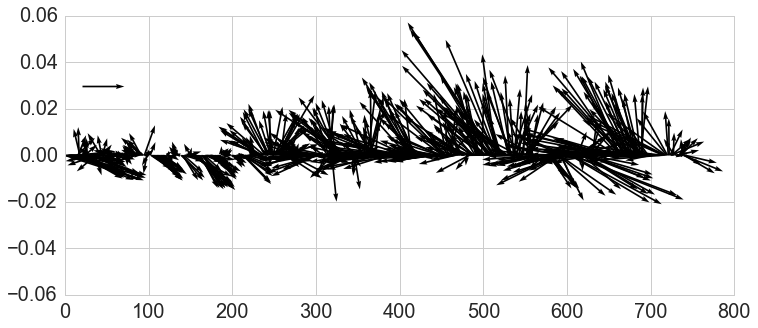

In [71]:
fig, ax = plt.subplots(1,1,figsize = (12,5))
quiver = ax.quiver(u_oct[:],v_oct[:],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '',coordinates='data', color='black', labelcolor='black')

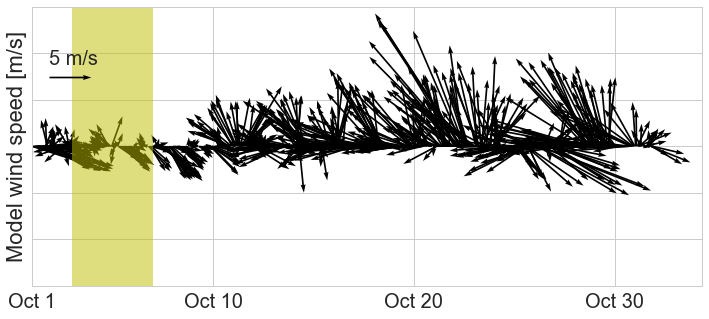

In [69]:
fig, ax = plt.subplots(1,1,figsize = (12,5))
quiver = ax.quiver(u_oct[:],v_oct[:],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '',coordinates='data', color='black', labelcolor='black')
ax.text(20,0.035,'5 m/s', fontsize = 20)
a = 48; b = 144
ax.axvspan(a, b, color='y', alpha=0.5, lw=0)
#plt.gca().yaxis.set_major_locator(plt.NullLocator())
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_ylabel('Model wind speed [m/s]')
ax.set_xticks([0, 216, 456,696])
ax.set_xticklabels(['Oct 1', 'Oct 10','Oct 20','Oct 30'])

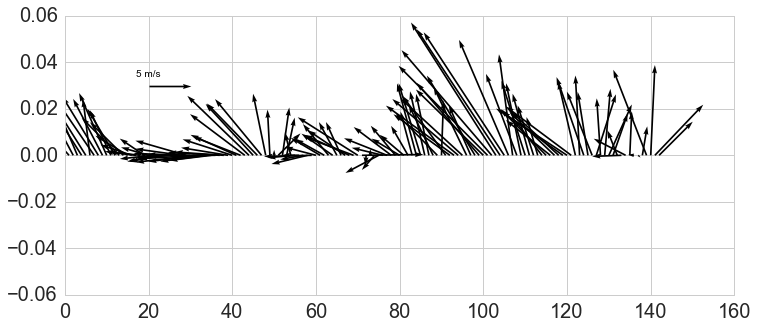

In [73]:
## A southward wind event in Oct
fig, ax = plt.subplots(1,1,figsize = (12,5))
quiver = ax.quiver(u_oct[:,408:551],v_oct[:,408:551],scale = 80,width=0.0025, color='k')
ax.quiverkey(quiver,20,0.03, 5, '5 m/s',coordinates='data', color='black', labelcolor='black')